In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import glob
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model

%matplotlib inline

C:\Users\Sur lab\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load data
filelst = glob.glob('TB-39 behavior data/*')
rawc_data = scipy.io.loadmat(filelst[0], squeeze_me=True, struct_as_record=False)

In [3]:
def make_frame(sessnum):
    '''Given a session number, return the data frame associated with that session'''
    rawc_data = scipy.io.loadmat(filelst[sessnum], squeeze_me=True, struct_as_record=False)
    data = rawc_data['data']

    # Extract relevant parameters: choice, target and reaction times
    choice = data.response.choice.astype('float64')
    choice[choice == 5] = np.nan
    target = data.stimuli.loc[:len(choice)].astype('float64')
    rtlst = data.response.timePC
    rts = np.zeros_like(choice, dtype='float64')
    
    choice_back1 =  [np.nan] + list(choice[:-1])
    choice_back2 =  [np.nan, np.nan] + list(choice[:-2])
    

    for i in range(len(choice)):
        rts[i] = rtlst[i][-1]
    
    rts_back1 = [np.nan] + list(rts[:-1])

    datadict = {'choice': choice, 'target': target, 'rt': rts, 'session': sessnum, 'back1': choice_back1,
               'back2': choice_back2, 'rts_back1': rts_back1}

    return pd.DataFrame(datadict)


In [4]:
choice = choice.astype('float64')
choice[choice==5] = np.nan

NameError: name 'choice' is not defined

In [5]:
all_frames = []
for i in range(len(filelst)):
    all_frames.append(make_frame(i))

all_frame = pd.concat(all_frames)

all_frame_nonan = all_frame.dropna()

In [6]:
all_frame_nonan

,back1,back2,choice,rt,rts_back1,session,target
7,1.0,2.0,2.0,0.514442,0.205064,0,2.0
8,2.0,1.0,1.0,0.174532,0.514442,0,1.0
9,1.0,2.0,2.0,0.361759,0.174532,0,2.0
10,2.0,1.0,1.0,0.290233,0.361759,0,1.0
11,1.0,2.0,2.0,0.299016,0.290233,0,2.0
15,2.0,1.0,1.0,0.202264,0.372806,0,1.0
16,1.0,2.0,2.0,0.318060,0.202264,0,2.0
17,2.0,1.0,1.0,0.198727,0.318060,0,1.0
21,1.0,2.0,2.0,1.902502,0.774303,0,2.0
36,1.0,2.0,2.0,0.165102,0.202190,0,2.0


R2 value is  0.7038992189531296
Weights are  [0.08034536 0.04989628 0.85284804]


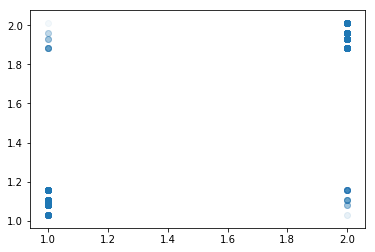

In [7]:
X = all_frame_nonan[['back1', 'back2', 'target']]
y = all_frame_nonan['choice']
model = linear_model.LinearRegression()
model.fit(X, y)
ypred = model.predict(X)
plt.scatter(y, ypred, alpha=0.05)

R2 = model.score(X, y)

print('R2 value is ', R2)
print('Weights are ', model.coef_)

R2 value is  0.058517334469527116
Weights are  [-0.00381065  0.00677716  0.06595869  0.02765384  0.07619658] 0.153102246292649


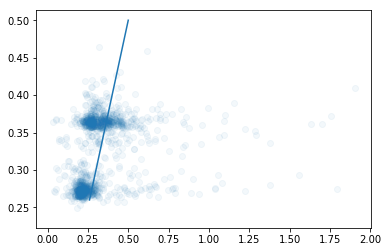

In [8]:
## Effect on reaction time
X = all_frame_nonan[['back1', 'back2', 'choice', 'target', 'rts_back1']]
y = all_frame_nonan['rt']

model = linear_model.LinearRegression()
model.fit(X, y)
ypred = model.predict(X)
plt.scatter(y, ypred, alpha=0.05)
plt.plot([0.26, 0.5], [0.26, 0.5])

R2 = model.score(X, y)

print('R2 value is ', R2)
print('Weights are ', model.coef_, model.intercept_)

In [ ]:
# Not a good model to explain reaction time

In [ ]:
rawc_data['data'].params.blockSeq

In [ ]:
a = rawc_data['data']

In [ ]:
b = a['delay']

In [ ]:
b[0]